# <span style="color:blue">Prueba - Análisis estadístico con Python</span>

## <span style="color:orange">Cargamos bibliotecas y data</span>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, \
    precision_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc, \
    mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm



df=pd.read_csv('/Users/andrea/Desktop/DATA SCIENCE/Modulo 3-Python-Estadistica/Regresion II/prueba/cardio.csv')
df

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,M,50,1.0,Yes,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,M,51,3.0,Yes,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,F,48,2.0,Yes,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,F,44,1.0,Yes,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


## <span style="color:purple">1.- Explorar los datos</span>

In [83]:
# Obtenemos información de la data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB


In [84]:
# Mostrar las columnas con datos nulos
df.isnull().sum()

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [85]:
# Eliminar los valores nulos y guarda el resultado en un nuevo DataFrame
df_clean = df.dropna()

# Verificar si hay valores nulos en el nuevo DataFrame
df_clean.isnull().sum()


sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## <span style="color:purple">2.- Análisis descriptivo de variables cuantitativas</span>

In [86]:
# Escoger las tres variables cuantitativas y mostrar los descriptivos correspondientes
df_clean[['age', 'sysBP', 'BMI']].describe()

,age,sysBP,BMI
count,3656.000000,3656.000000,3656.000000
mean,49.557440,132.368025,25.784185
std,8.561133,22.092444,4.065913
min,32.000000,83.500000,15.540000
25%,42.000000,117.000000,23.080000
50%,49.000000,128.000000,25.380000
75%,56.000000,144.000000,28.040000
max,70.000000,295.000000,56.800000


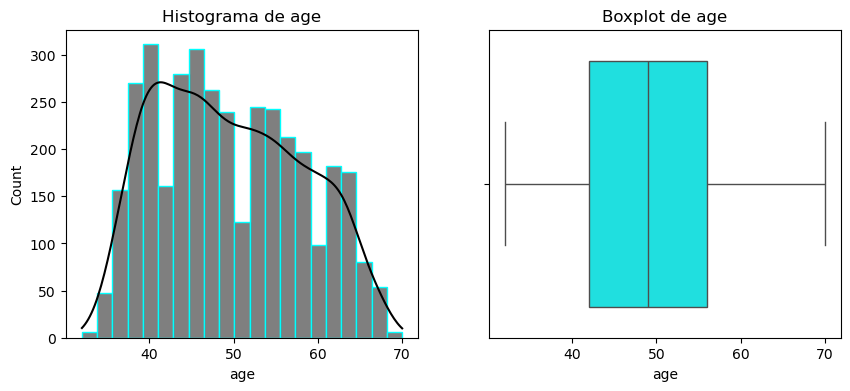

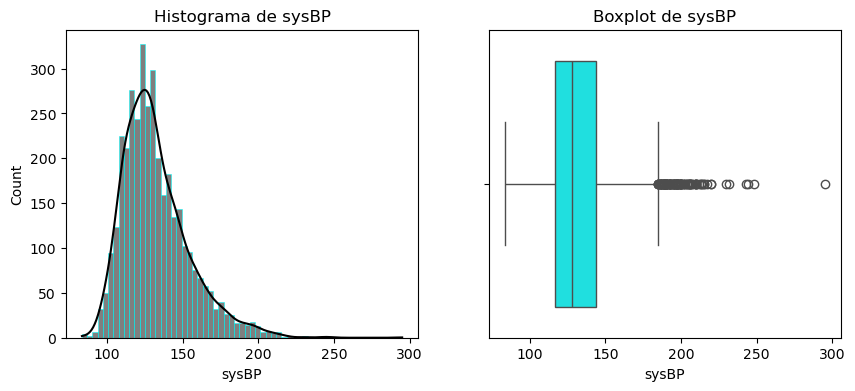

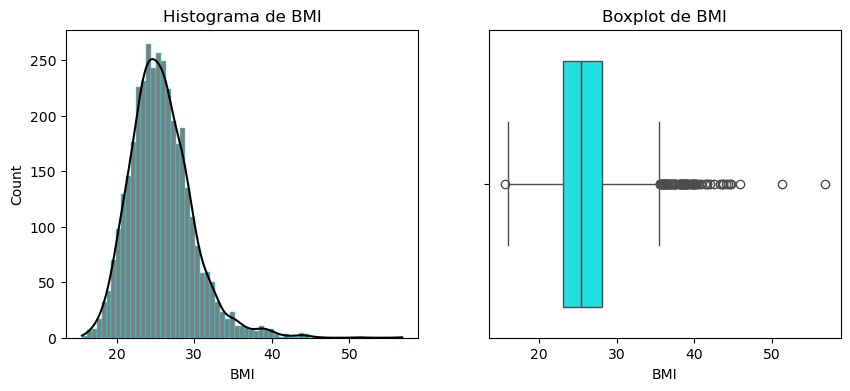

In [87]:
'''Para visualizar la distribución de cada variable se 
pueden utilizar gráficos de histograma y boxplot para analizar la dispersión de los datos.'''

# Crear histogramas y boxplots para las tres variables

variables = ['age', 'sysBP', 'BMI']

for var in variables:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df_clean[var], kde=True, color='black', edgecolor='cyan')
    plt.title(f'Histograma de {var}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_clean[var], color="cyan")
    plt.title(f'Boxplot de {var}')
    
    plt.show()

In [88]:
'''Para determinar cuál variable presenta mayor dispersión, se puede comparar la desviación estándar de cada una.'''

# Calcular la dispersión (desviación estándar) de las variables seleccionadas
dispersion = df_clean[variables].std()

# Mostrar la dispersión de cada variable
for var, value in dispersion.items():
    print(f"La dispersión de la variable {var} es: {value:.5f}")

# Mostrar la variable con la mayor dispersión
print(f"\nLa mayor dispersión es de la variable *{dispersion.idxmax()}* con un valor de {dispersion.max():.5f}")


La dispersión de la variable age es: 8.56113
La dispersión de la variable sysBP es: 22.09244
La dispersión de la variable BMI es: 4.06591

La mayor dispersión es de la variable *sysBP* con un valor de 22.09244


## <span style="color:purple">3.- Eliminar datos atípicos</span>

In [89]:
'''Utilizamos el rango intercuartílico (IQR) para eliminar los valores atípicos (outliers), 
que son aquellos datos que están fuera de los límites aceptables en cada variable. 
Este método considera como atípicos a los datos que están por debajo del primer cuartil (Q1) 
menos 1.5 veces el IQR o por encima del tercer cuartil (Q3) más 1.5 veces el IQR.'''

# Función para eliminar los datos atípicos de una columna específica del DataFrame
def remove_outliers(df, columna):
    # Calcular el primer cuartil (Q1) de la columna
    Q1 = df[columna].quantile(0.25)
    # Calcular el tercer cuartil (Q3) de la columna
    Q3 = df[columna].quantile(0.75)
    # Calcular el rango intercuartílico (IQR), que es la diferencia entre Q3 y Q1
    IQR = Q3 - Q1
    # Filtrar el DataFrame eliminando los datos que están fuera de los límites aceptables
    return df[~((df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Aplicar la función 'remove_outliers' para eliminar los datos atípicos de todas las variables en 'variables'
df_clean_no_outliers = remove_outliers(df_clean, variables)

# Verificar el tamaño original del DataFrame y el tamaño después de eliminar los datos atípicos
print(df_clean.shape, df_clean_no_outliers.shape)



(3656, 16) (3481, 16)


## <span style="color:purple">4.- Correlación entre variables cuantitativas</span>

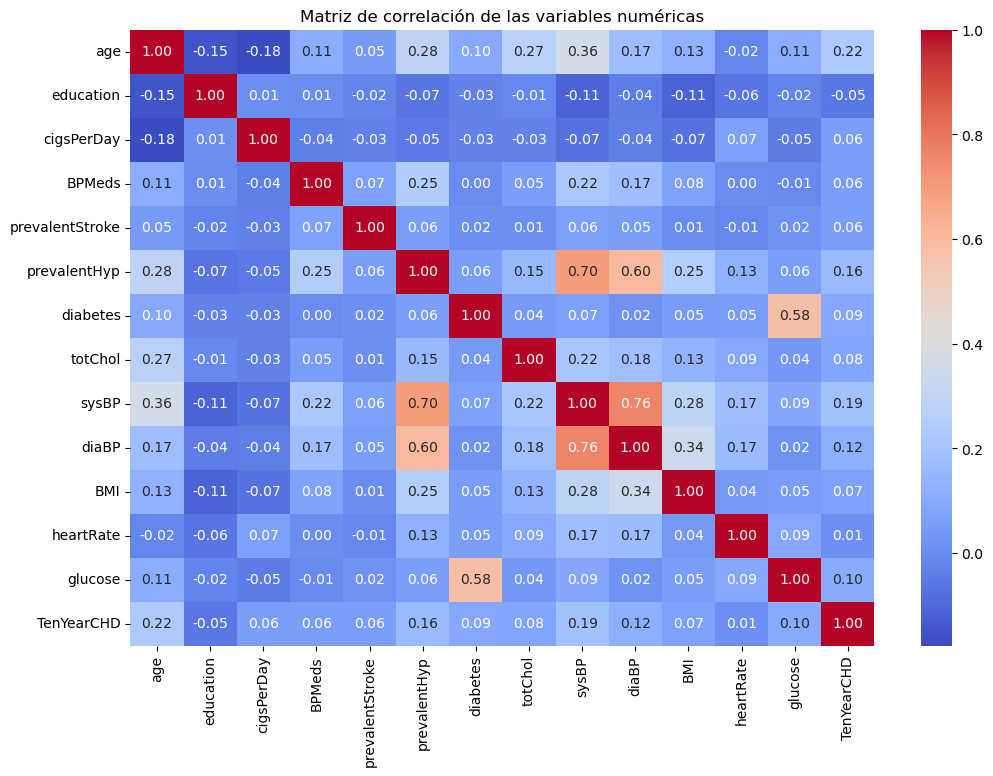

In [90]:
# Mantener el dataframe filtrado intacto para no ocasionar dificultades con futuros análisis
df_completo = df_clean_no_outliers

# Seleccionar solo las columnas numéricas del DataFrame df_clean_no_outliers
variables_numericas = df_completo.select_dtypes(include=[np.number])

# Calcular la matriz de correlación de las variables numéricas
correlation_matrix = variables_numericas.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación de las variables numéricas')
plt.show()


### <span style="color:blue">Varialebes con mayor correlación:</span>

- **sysBP y diaBP -> 0.76**: La fuerte correlación entre estos dos tipos de presión arterial sugiere que ambas medidas están altamente relacionadas. Este resultado es coherente con el hecho de que la presión arterial alta es un factor de riesgo clave para enfermedades cardiovasculares.


- **sysBP y prevalentHyp -> 0.70**: La alta correlación entre la presión sistólica y la prevalencia de hipertensión respalda la idea de que la presión arterial sistólica es uno de los principales factores a tener en cuenta para diagnosticar la hipertensión. 


- **diaBP y prevalentHyp -> 0.60**: La presión diastólica (diaBP) tiene una relación un poco menor que la sistólica con la prevalencia de hipertensión. Esto refuerza la importancia de monitorear ambas medidas de presión arterial, aunque la presión sistólica podría ser un indicador más fiable de la hipertensión.


- **diabetes y glucosa -> 0.58**: La correlación entre la glucosa y la diabetes muestra que el nivel de glucosa es un buen predictor de la presencia de diabetes en los pacientes. Esta correlación es consistente con la enfermedad de la diabetes, ya que los pacientes que la padecen suelen tener dificultades para controlar sus niveles de glucosa en sangre.


## <span style="color:purple">5.- Probabilidad de que sea hombre, si se sabe que pertenece al mayor cuartil de la variable correspondiente al índice de masa corporal (BMI)</span>

In [107]:
'''Este código tiene como objetivo calcular la proporción de hombres dentro del mayor cuartil (percentil 75) 
de la variable BMI (Índice de Masa Corporal). El proceso incluye identificar a los pacientes que están en 
ese cuartil superior y determinar cuántos de ellos son hombres.'''

# Calcular el percentil 75 (Q3) de la variable BMI para definir el límite superior del mayor cuartil
q3_bmi = df_clean_no_outliers['BMI'].quantile(0.75)

# Filtrar los pacientes cuyo valor de BMI es mayor que el percentil 75, es decir, aquellos que están en el mayor cuartil
mayor_cuartil_bmi = df_clean_no_outliers[df_clean_no_outliers['BMI'] > q3_bmi]

# Contar el número total de personas en el mayor cuartil del BMI
total_mayor_cuartil = mayor_cuartil_bmi.shape[0]

# Filtrar y contar cuántos de los pacientes en el mayor cuartil son hombres (donde 'sex' es igual a 'M')
hombres_mayor_cuartil = mayor_cuartil_bmi[mayor_cuartil_bmi['sex'] == 'M'].shape[0]

# Calcular la probabilidad de que un paciente sea hombre, dado que pertenece al mayor cuartil de BMI
probabilidad_hombre = hombres_mayor_cuartil / total_mayor_cuartil

# Imprimir el resultado de la probabilidad, formateado con dos decimales
print(f"Probabilidad de que un paciente sea hombre, dado que pertenece al mayor cuartil de BMI: {probabilidad_hombre:.2f}")



Probabilidad de que un paciente sea hombre, dado que pertenece al mayor cuartil de BMI: 0.54


## <span style="color:purple">6.- Afirmar que una persona cualquiera con ritmo cardiaco promedio de 75</span>

Para desarrollar esta pregunta se realiza un análisis estadístico sobre la variable *heartRate* (ritmo cardíaco) para poder determinar si con los datos disponibles, es razonable asumir que el ritmo cardíaco promedio de una persona cualquiera sea 75.

Para ello seguimos los siguientes pasos:

- Obtener el promedio del ritmo cardíaco.
- Realizar una prueba de hipótesis para determinar si el valor de 75 está dentro del rango para el promedio poblacional.
- <span style="color:green">Hipótesis:</span>
    - <span style="color:olive">Hipótesis nula (H₀):</span> El ritmo cardíaco promedio es igual a 75.
    - <span style="color:olive">Hipótesis alternativa (H₁):</span> El ritmo cardíaco promedio es diferente de 75.
- Utilizaremos una prueba de hipótesis t para una muestra.

In [109]:
# Extraer la variable 'heartRate' del DataFrame limpio sin valores atípicos
heart_rate = df_clean_no_outliers['heartRate']

# Calcular la media del ritmo cardíaco
mean_heart_rate = heart_rate.mean()

# Calcular la desviación estándar del ritmo cardíaco, que mide la dispersión de los datos alrededor de la media
std_heart_rate = heart_rate.std()

# Calcular el número total de observaciones en la variable 'heartRate'
n = len(heart_rate)

# Imprimir los resultados de la media y desviación estándar del ritmo cardíaco 
print(f"Media del ritmo cardíaco: {mean_heart_rate:.5f}")
print(f"Desviación estándar del ritmo cardíaco: {std_heart_rate:.5f}")

# Realizar una prueba t para una muestra, comparando la media del ritmo cardíaco observada con un valor hipotético de 75
# La hipótesis nula (H0) establece que la media del ritmo cardíaco es igual a 75
t_stat, p_value = stats.ttest_1samp(heart_rate, 75)

# Mostrar el resultado de la prueba t: el estadístico t y el valor p 
print(f"\nEstadístico t: {t_stat:.5f}")
print(f"Valor p: {p_value:.5f}")

# Definir el nivel de significancia (alpha), que es el umbral para rechazar o no la hipótesis nula
alpha = 0.05

# Comparar el valor p con el nivel de significancia (alpha) para decidir si se rechaza la hipótesis nula
if p_value < alpha:
    # Si el valor p es menor que alpha, rechazamos la hipótesis nula, lo que indica que el ritmo cardíaco promedio es significativamente diferente de 75
    print("\nRechazamos la hipótesis nula: El ritmo cardíaco promedio es significativamente diferente de 75.")
else:
    # Si el valor p es mayor o igual que alpha, no tenemos suficiente evidencia para rechazar la hipótesis nula
    print("\nNo rechazamos la hipótesis nula: No hay evidencia suficiente para decir que el ritmo cardíaco promedio es diferente de 75.")


Media del ritmo cardíaco: 75.48951
Desviación estándar del ritmo cardíaco: 11.83272

Estadístico t: 2.44081
Valor p: 0.01470

Rechazamos la hipótesis nula: El ritmo cardíaco promedio es significativamente diferente de 75.


### <span style="color:blue">Explicación del análisis:</span>

- **Media y desviación estándar**: Calculamos el promedio y desviación estándar del ritmo cardíaco de los pacientes en el dataset.

- **Prueba t de una muestra**: Comparamos el promedio del dataset con el valor propuesto (75). La prueba de hipótesis t nos indicará si la diferencia es estadísticamente significativa.

- **Valor p y decisión**: Si el valor p es menor que 0.05, rechazaremos la hipótesis nula y afirmaremos que el ritmo cardíaco promedio es significativamente diferente de 75. Si el valor p es mayor, no rechazaremos la hipótesis nula.


### <span style="color:blue">Justificación:</span>

- Si no rechazamos la hipótesis nula, se puede afirmar que el ritmo cardíaco promedio de una persona cualquiera es 75, ya que no hay suficiente evidencia estadística para demostrar lo contrario.

- Si rechazamos la hipótesis nula, significaría que basándonos en los datos del dataset, el ritmo cardíaco de una persona cualquiera promedio es significativamente diferente de 75.

**Cuando rechazamos la hipótesis nula significa que tenemos suficiente evidencia estadística para afirmar que el ritmo cardíaco promedio en la población es significativamente diferente de 75. Esto es porque la prueba t determina que la diferencia es significativa estadísticamente, independiente que la media del ritmo cardiaco es 75.44 lo que es muy cercano a 75.**

### <span style="color:blue">Visualización del análisis realizado</span>

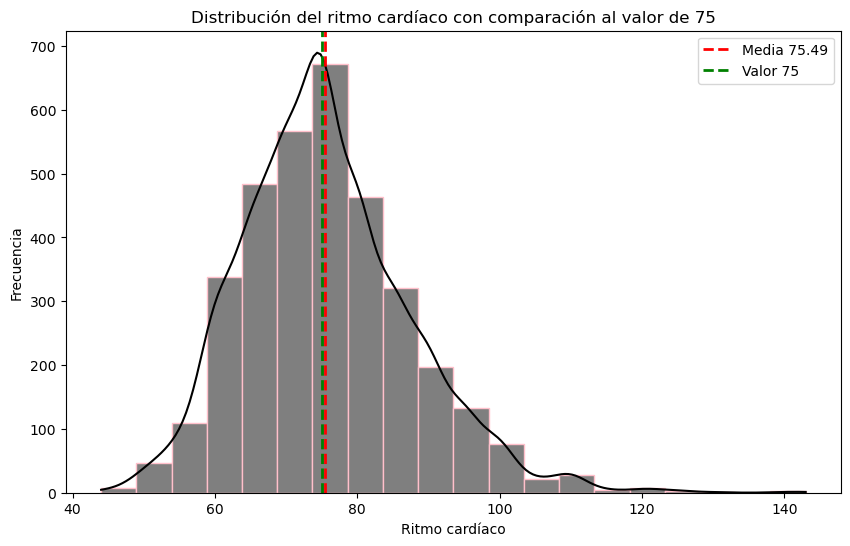

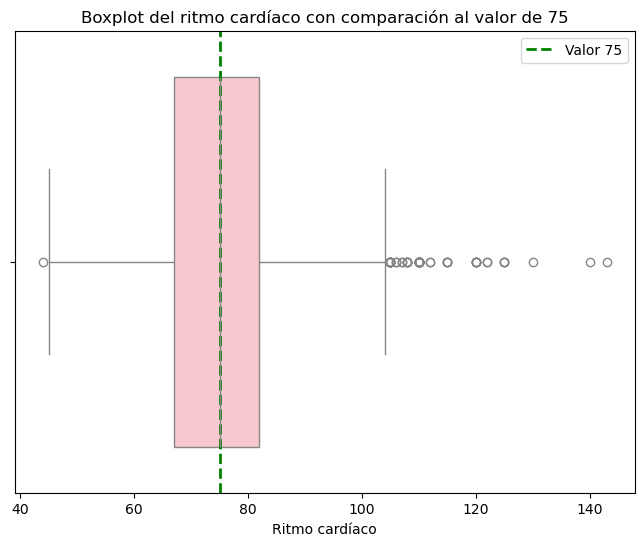

In [93]:

# Histograma de la distribución del ritmo cardíaco
plt.figure(figsize=(10, 6))
sns.histplot(df_clean_no_outliers['heartRate'], bins=20, kde=True, color='black', edgecolor='pink')

# Agregar una línea vertical en la media y en 75
plt.axvline(df_clean_no_outliers['heartRate'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Media {df_clean_no_outliers["heartRate"].mean():.2f}')
plt.axvline(75, color='green', linestyle='dashed', linewidth=2, label='Valor 75')

# Añadir etiquetas y título
plt.title('Distribución del ritmo cardíaco con comparación al valor de 75')
plt.xlabel('Ritmo cardíaco')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Crear un boxplot del ritmo cardíaco
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean_no_outliers['heartRate'], color='pink')

# Agregar una línea horizontal en el valor de 75
plt.axvline(75, color='green', linestyle='dashed', linewidth=2, label='Valor 75')

# Añadir etiquetas y título
plt.title('Boxplot del ritmo cardíaco con comparación al valor de 75')
plt.xlabel('Ritmo cardíaco')
plt.legend()
plt.show()



### <span style="color:blue">Explicación de los gráficos:</span>

- **Histograma con KDE**: El histograma muestra cómo se distribuyen los valores de heartRate. La línea roja representa la media del ritmo cardíaco y la línea verde es el valor de 75. Esto ayuda a ver si el valor de 75 se encuentra cerca o lejos de la media observada en los datos.

- **Boxplot**: El boxplot nos da una visión clara de la mediana, además de los cuartiles y los posibles outliers en los datos. La línea verde en 75 nos permite comparar este valor con la mediana y los rangos de los intercuantiles de los datos.

### <span style="color:blue">Interpretación visual:</span>

- Si la línea verde (75) está muy alejada de la media en el histograma o de la mediana en el boxplot, esto sugiere que el valor de 75 no es representativo del ritmo cardíaco promedio en estos datos, lo que refuerza los resultados de la prueba de hipótesis.

- Si está cerca de la media o mediana, podría sugerir que es razonable asumir que el ritmo cardíaco promedio de una persona es 75, aunque la prueba de hipótesis tendría la última palabra.

**En este caso la prueba de hipótesis demuestra que que aunque visualmente se pueda aceptar la hispótesis nula, estadísticamente ésta debe ser rechazada**


## <span style="color:purple">7.- Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día dentro de los pacientes fumadores?</span>

Primero necesitamos comparar el promedio de cigarrillos consumidos por hombres y mujeres, esto se hace solo dentro de los pacientes que son fumadores utilizando un t-test para verificar si existe una diferencia significativa entre los hombres y las mujeres en cuanto al número de cigarrillos consumidos por día.

- <span style="color:green">Planteamos la hipótesis:</span>
    - <span style="color:olive">Hipótesis nula (H₀):</span> No hay diferencia significativa en el promedio de cigarrillos consumidos por hombres y mujeres fumadores.
    - <span style="color:olive">Hipótesis alternativa (H₁):</span> Hay una diferencia significativa en el promedio de cigarrillos consumidos por hombres y mujeres fumadores.

Seguimos los siguientes pasos:

- Filtrar los datos para obtener solo a los pacientes fumadores.

- Comparar el promedio de cigarrillos consumidos por día entre hombres y mujeres fumadores.

- Realizar una prueba t de Student para determinar si la diferencia entre los grupos es estadísticamente significativa.

In [111]:
# Filtrar los fumadores actuales ('currentSmoker' == 'Yes')
fumadores = df_clean_no_outliers[df_clean_no_outliers['currentSmoker'] == 'Yes']

# Calcular el promedio de cigarrillos por día ('cigsPerDay') para hombres y mujeres
promedio_cigs_sexo = fumadores.groupby('sex')['cigsPerDay'].mean()

# Mostrar el promedio de cigarrillos por día para cada sexo
print(f'El promedio de cigarillos por día para cada sexo es:\n{promedio_cigs_sexo}')

# Obtener los valores de cigarrillos por día para hombres ('M') y mujeres ('F'), eliminando valores nulos
hombres = fumadores[fumadores['sex'] == 'M']['cigsPerDay'].dropna()
mujeres = fumadores[fumadores['sex'] == 'F']['cigsPerDay'].dropna()

# Prueba t para comparar los promedios de cigarrillos entre hombres y mujeres (asumiendo varianzas desiguales)
t_stat, p_value = stats.ttest_ind(hombres, mujeres, equal_var=False)

# Imprimir el estadístico t y el valor p
print(f'\nEstadístico t: {t_stat:}')
print(f'Valor p: {p_value:}')

# Verificar si p < 0.05 para determinar si hay una diferencia significativa
if p_value < 0.05:
    print("\nExiste una diferencia significativa en el promedio de cigarrillos entre hombres y mujeres.")
else:
    print("\nNo existe una diferencia significativa en el promedio de cigarrillos entre hombres y mujeres.")


El promedio de cigarillos por día para cada sexo es:
sex
F    13.799740
M    22.280665
Name: cigsPerDay, dtype: float64

Estadístico t: 18.06743146040214
Valor p: 5.640721666683764e-67

Existe una diferencia significativa en el promedio de cigarrillos entre hombres y mujeres.


### <span style="color:blue">Explicación:</span>

- **Promedio de cigarrillos por día según el sexo**:

    - Las mujeres fuman un promedio de 13.8 cigarrillos por día.
    - Los hombres fuman un promedio de 22.3 cigarrillos por día. 
    
 **Esto indica que, en promedio, los hombres fuman más cigarrillos que las mujeres.**
 

- **Prueba t de Student**:

    - **El estadístico t** resultó ser 18.07, lo que indica una diferencia considerable entre los dos grupos.
    
    - **El valor p** obtenido es 5.64e-67, que es extremadamente pequeño, muy por debajo de 0.05. Esto significa que hay una diferencia significativa en el consumo de cigarrillos entre hombres y mujeres. **Con este valor podemos rechazar la hipótesis nula.**

### <span style="color:blue">Visualización del análisis realizado</span>

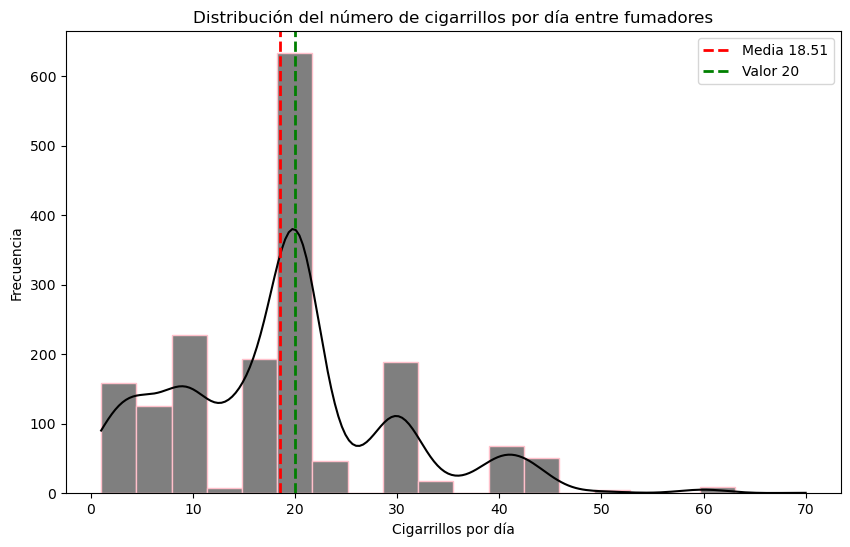

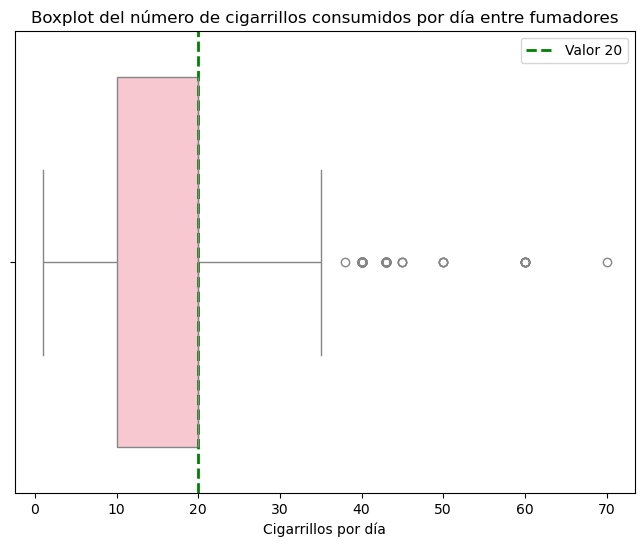

In [95]:
# Histograma de la distribución de cigarrillos consumidos por día
plt.figure(figsize=(10, 6))
sns.histplot(fumadores['cigsPerDay'], bins=20, kde=True, color='black', edgecolor='pink')

# Agregar una línea vertical en la media y en el valor de interés (por ejemplo, 20 cigarrillos por día)
plt.axvline(fumadores['cigsPerDay'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Media {fumadores["cigsPerDay"].mean():.2f}')
plt.axvline(20, color='green', linestyle='dashed', linewidth=2, label='Valor 20')

# Añadir etiquetas y título
plt.title('Distribución del número de cigarrillos por día entre fumadores')
plt.xlabel('Cigarrillos por día')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Crear un boxplot del número de cigarrillos por día
plt.figure(figsize=(8, 6))
sns.boxplot(x=fumadores['cigsPerDay'], color='pink')

# Agregar una línea vertical en el valor de interés (como ejemplo, 20 cigarrillos por día)
plt.axvline(20, color='green', linestyle='dashed', linewidth=2, label='Valor 20')

# Añadir etiquetas y título
plt.title('Boxplot del número de cigarrillos consumidos por día entre fumadores')
plt.xlabel('Cigarrillos por día')
plt.legend()
plt.show()


### <span style="color:blue">Explicación de los gráficos:</span>

- **Histograma con KDE -> Distribución del número de cigarrillos por dia**: El histograma muestra cómo se distribuyen la cantidad de cigarros consumidos por día. La línea roja representa la media de cigarrillos consumidos por los fumadores (18.51 cigarrillos por día), y la línea verde marca un valor de referencia de 20 cigarrillos por día. **En la interpretación visual** se pude observar una distribución entre los picos muy clara, mostrabdo una mayor frecuencia en el varlor de referencia que es 20 cigarrillos por día.


- **Boxplot -> Número de cigarrillos consumidos**: En este gráfico se muestra el número de cigarrillos consumidos por día. También se marca con una línea verde el valor de referencia de 20 cigarrillos por día. **En la interpretación visual** se muestra la dispersión de los datos, con algunos valores atípicos por encima de los 40 cigarrillos.

### <span style="color:blue">Conclusión:</span>

- Los resultados del análisis muestran que hay una **diferencia significativa** en el número de cigarrillos consumidos por día entre hombres y mujeres fumadores, siendo los hombres los mayores consumidores.

- Los gráficos refuerzan esta conclusión, mostrando la distribución de los datos, resaltando el promedio y el valor de referencia.

## <span style="color:purple">8.- Modelo de regresión lineal</span>

Pasos:

- **Seleccionar variables predictoras**: Selecciona 6 variables, que incluyen variables cualitativas. 

- **Codificación de variables cualitativas**: Conviertir las variables categóricas en variables dummy usando *pd.get_dummies*.

- **Entrenar el modelo de regresión lineal**.

- **Evaluar el modelo** 

In [112]:
# Definir las variables independientes (X) y la variable dependiente (y)
# X incluye características como edad, presión sistólica, ritmo cardíaco, sexo, si es fumador y nivel de glucosa
# y es la variable objetivo (BMI - Índice de Masa Corporal)
X = df_clean_no_outliers[['age', 'sysBP', 'heartRate', 'sex', 'currentSmoker', 'glucose']] 
y = df_clean_no_outliers['BMI']

# Convertir variables categóricas como 'sex' y 'currentSmoker' a variables dummy (codificación binaria)
# drop_first=True elimina una de las categorías para evitar la multicolinealidad
X = pd.get_dummies(X, drop_first=True)

# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%) para evaluar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Añadir una constante (intercepto) y asegurarse de que todos los datos sean de tipo numérico (float)
X_train_ols = sm.add_constant(X_train).astype(float)
X_test_ols = sm.add_constant(X_test).astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Crear el modelo de Regresión Lineal Ordinaria (OLS) y entrenarlo con los datos de entrenamiento
model = sm.OLS(y_train, X_train_ols).fit()

# Mostrar el resumen del modelo con las estadísticas clave
print(model.summary())

# Predecir los valores de la variable objetivo (BMI) utilizando los datos de prueba
y_pred = model.predict(X_test_ols)

# Evaluar el rendimiento del modelo usando diversas métricas
mse = mean_squared_error(y_test, y_pred)  # Error Cuadrático Medio (MSE) mide la diferencia promedio entre los valores reales y predichos
r2 = r2_score(y_test, y_pred)  # Coeficiente de Determinación (R²) mide la proporción de varianza explicada por el modelo
emse = explained_variance_score(y_test, y_pred)  # Varianza Explicada mide la calidad de las predicciones
mae = mean_absolute_error(y_test, y_pred)  # Error Absoluto Medio (MAE) mide el error promedio entre los valores reales y predichos

# Separador visual para los resultados
print("____________________________________________________________________________________________________")

# Mostrar las métricas de evaluación del modelo
print(f"\n\nMSE (Error Cuadrático Medio): {mse}")
print(f"R2 (Coeficiente de Determinación): {r2}")
print(f"EMSE (Varianza Explicada): {emse}")
print(f"MAE (Error Absoluto Medio): {mae}")


                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     58.64
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           1.43e-68
Time:                        23:10:18   Log-Likelihood:                -7279.4
No. Observations:                2784   AIC:                         1.457e+04
Df Residuals:                    2777   BIC:                         1.461e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                19.0083      0.64

### <span style="color:blue">Evaluación del modelo:</span>

1. **Ajuste del Modelo (R²):**
   - El R² del modelo es **0.112**, lo que indica que el modelo explica solo el 11.2% de la variabilidad en el BMI. Esto sugiere que el modelo tiene un bajo poder predictivo.
   

2. **Significancia del Modelo:**
   - El modelo es estadísticamente significativo (F-statistic: **58.64**, p-value: **1.43e-68**), lo que indica que al menos una de las variables independientes tiene un efecto significativo sobre el BMI.
   

3. **Variables Significativas:**
   - **Presión Sistólica (sysBP):** Aumento significativo del BMI por cada unidad de presión sistólica.
   - **Sexo (Hombres):** Los hombres tienen un BMI más alto que las mujeres.
   - **Fumadores Actuales:** Los fumadores tienen un BMI más bajo que los no fumadores.
   

4. **Variables No Significativas:**
   - **Edad**, **Ritmo Cardíaco (heartRate)** y **Glucosa** no tienen un impacto significativo en el BMI.
   

5. **Métricas de Evaluación:**
   - **MSE (Error Cuadrático Medio):** **9.93**
   - **MAE (Error Absoluto Medio):** **2.498**
   - **R² (Prueba):** **0.1796**: Solo el 17.96% de la variabilidad en los datos de prueba es explicada por el modelo.

#### <span style="color:orange">Conclusión:</span> El modelo es estadísticamente significativo, pero tiene un bajo poder explicativo. Es recomendable revisar las variables utilizadas, considerar transformaciones, y evaluar posibles interacciones para mejorar el rendimiento.



### <span style="color:blue">Visualización del análisis realizado</span>

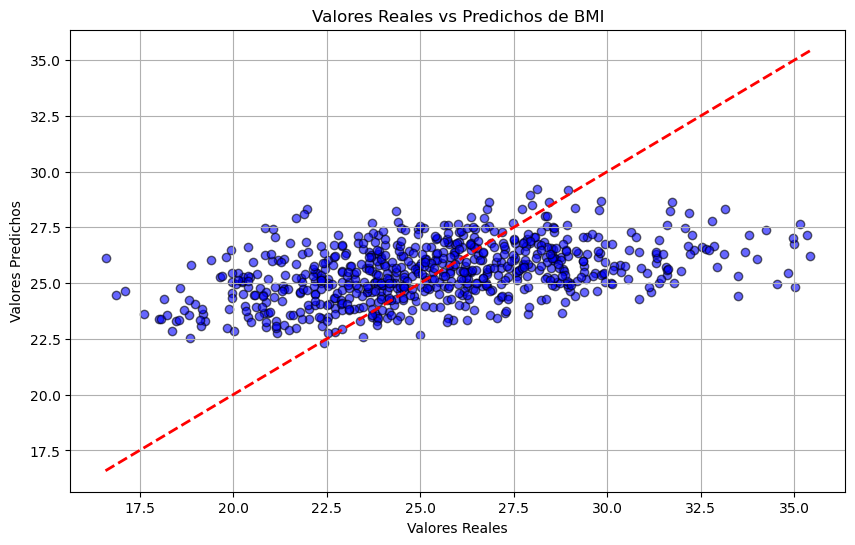

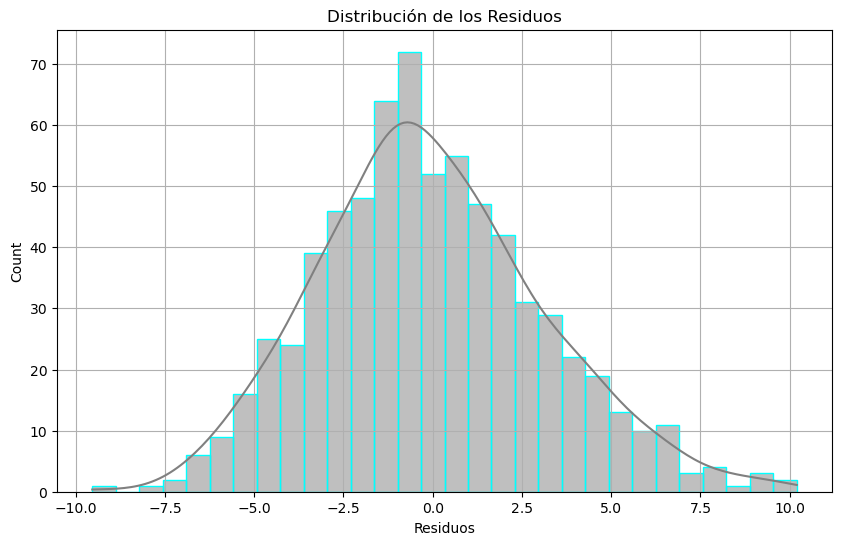

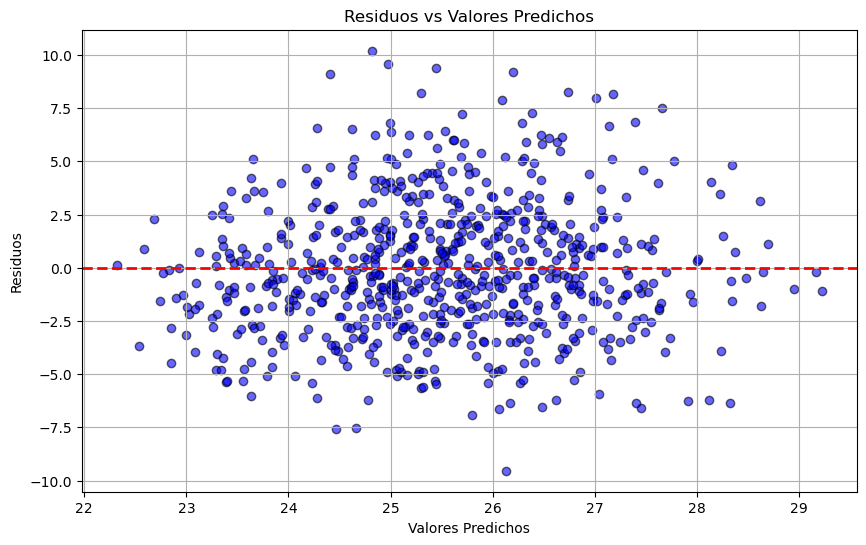

In [97]:
# Gráfico de valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Predichos de BMI')
plt.grid(True)
plt.show()

# Gráfico de residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='gray', edgecolor='cyan', bins=30)
plt.xlabel('Residuos')
plt.title('Distribución de los Residuos')
plt.grid(True)
plt.show()

# Gráfico de residuos vs valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, color='blue', edgecolor='k', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Predichos')
plt.grid(True)
plt.show()


### <span style="color:blue">Explicación de los gráficos:</span>

1. **Gráfico 1 - Valores Reales vs. Valores Predichos de BMI**: Este gráfico de dispersión compara los valores reales de BMI (en el eje X) con los valores predichos por el modelo (en el eje Y). La línea roja punteada representa la línea de referencia donde los valores predichos serían exactamente iguales a los valores reales. Es por esto, que un buen modelo debería tener la mayor cantidad de puntos lo más cerca posible de esta línea roja. En este caso, hay muchos puntos que están relativamente dispersos de la línea roja, lo que indica que el modelo no tiene un rendimiento óptimo. La dispersión sugiere que el modelo no está capturando toda la variabilidad del BMI, lo que es consistente con el bajo valor de R² que se obtuvo en las métricas (0.1796).

2. **Gráfico 2 - Distribución de los Residuos**: Es un histograma que muestra la distribución de los residuos (la diferencia entre los valores reales y los valores predichos). También se muestra una línea de densidad para visualizar mejor la forma de la distribución. Para este modelo la distribución de los residuos parece estar relativamente centrada en 0, lo cual es una buena señal, pero hay una ligera asimetría hacia los valores positivos, esto indica que el modelo tiende a subestimar ligeramente algunos valores de BMI.

3. **Gráfico 3 - Residuos vs Valores Predichos**: En este gráfico, se comparan los valores predichos con los residuos. La línea roja punteada a lo largo de y = 0 representa el lugar ideal donde los residuos deberían concentrarse si el modelo es bueno. En este modelo los residuos están bastante dispersos y no parecen seguir un patrón claro. Sin embargo, la dispersión de los puntos en todo el rango indica que el modelo puede tener problemas para predecir con precisión ciertos valores de BMI, lo que coincide con el bajo poder predictivo del modelo reflejado en el R².

**Conclusión General: Los gráficos refuerzan las métricas numéricas que se obtuvieron. Esto indica que el ajuste del modelo no es óptimo, como lo indican los puntos dispersos alrededor de la línea de valores reales vs. predichos y la ligera asimetría en los residuos.
El bajo valor de R² (0.1796) sigue siendo una indicación de que el modelo está capturando una porción limitada de la variabilidad en el BMI.
Si bien los residuos no muestran un patrón claro, la dispersión sugiere que se puede mejorar el modelo.**



## <span style="color:purple">9.- Modelo de regresión logística</span>

In [98]:
# Verificar los valores nulos para asegurarse que los valores esten limpios después de las posibles
#modificaciones realizadas a la data
print(df_clean_no_outliers.isnull().sum())


sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [99]:
# Es importante verificar si la variable objetivo está balanceada o si se necesita un método de balanceo 
# Verificar distribución de la variable objetivo

print(df_clean_no_outliers['TenYearCHD'].value_counts(normalize=True))

TenYearCHD
0    0.85665
1    0.14335
Name: proportion, dtype: float64


In [113]:
# Definir las columnas relevantes para el análisis
# 'variables' incluye las características que se utilizarán como predictores del modelo
# 'target' es la variable objetivo que indica si el paciente tiene riesgo de enfermedad coronaria a 10 años (TenYearCHD)
variables = ['age', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose']
target = 'TenYearCHD'

# Dividir los datos en características (X) y objetivo (y)
# X contiene las variables predictoras y y contiene la variable objetivo
X = df_clean_no_outliers[variables]
y = df_clean_no_outliers[target]

# Dividir los datos en conjunto de entrenamiento (70%) y prueba (30%) para evaluación
# 'random_state=42' asegura que los resultados sean reproducibles
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar SMOTE (Synthetic Minority Over-sampling Technique) al conjunto de entrenamiento
# SMOTE genera ejemplos sintéticos para balancear la clase minoritaria en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificar la distribución de la variable objetivo después de aplicar SMOTE
# Se imprime la proporción de cada clase (balance entre positivos y negativos) en el conjunto de entrenamiento balanceado
print("Distribución después de aplicar SMOTE en el conjunto de entrenamiento:")
print(y_train_smote.value_counts(normalize=True))


Distribución después de aplicar SMOTE en el conjunto de entrenamiento:
TenYearCHD
1    0.5
0    0.5
Name: proportion, dtype: float64


In [114]:
# Escalar las variables numéricas utilizando StandardScaler
# Esto asegura que todas las características numéricas tengan media 0 y desviación estándar 1
# Se ajusta el escalador a los datos de entrenamiento balanceados y se transforma tanto el conjunto de entrenamiento como el de prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)  # Ajustar y escalar el conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test)  # Solo escalar el conjunto de prueba usando el mismo escalador

# Crear un modelo de regresión logística para la clasificación
# La regresión logística es adecuada para este tipo de problemas binarios
model = LogisticRegression()
model.fit(X_train_scaled, y_train_smote)  # Entrenar el modelo con los datos de entrenamiento balanceados y escalados

# Evaluar el modelo prediciendo las etiquetas del conjunto de prueba
y_pred = model.predict(X_test_scaled)  # Predecir el conjunto de prueba escalado

# Generar un informe de clasificación que incluye métricas como precisión, recall, f1-score y soporte
report = classification_report(y_test, y_pred)
print('Informe de Clasificación:')
print(report)

# Calcular y mostrar la matriz de confusión
# La matriz de confusión muestra la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos
confusion = confusion_matrix(y_test, y_pred)
print('\n\nMatriz de Confusión:')
print(confusion)

# Calcular y mostrar la precisión general del modelo
# La precisión es la proporción de predicciones correctas sobre el total de predicciones
accuracy = accuracy_score(y_test, y_pred)
print(f'\n\nPrecisión del modelo: {accuracy}')


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.65      0.76       887
           1       0.25      0.66      0.36       158

    accuracy                           0.65      1045
   macro avg       0.58      0.66      0.56      1045
weighted avg       0.81      0.65      0.70      1045



Matriz de Confusión:
[[579 308]
 [ 54 104]]


Precisión del modelo: 0.6535885167464115


### <span style="color:blue">Explicación de los datos del modelo</span>

El modelo de regresión logística fue evaluado con un conjunto de prueba de 1045 instancias, de las cuales 887 pertenecen a la *clase 0* (no desarrollarán enfermedad coronaria) y 158 pertenecen a la *clase 1* (sí desarrollarán enfermedad coronaria).

#### Informe de Clasificación:

- Para la **clase 0**, el modelo tuvo un buen rendimiento en términos de precisión (0.91) y F1-Score (0.76), aunque el recall fue de 0.65, lo que indica que no capturó correctamente a todos los negativos verdaderos.

- Para la **clase 1**, aunque el **recall fue de 0.66**, que quiere decir que el modelo capturó correctamente el 66% de los casos con enfermedad coronaria, la **precisión fue baja (0.25)**, lo que indica que solo el 25% de las veces que el modelo predijo la *clase 1*, lo hizo de forma correcta.

- El **F1-Score** para la *clase 1* fue de 0.36, lo que muestra que el modelo tiene dificultades para predecir correctamente esta clase.

#### Matriz de Confusión:

- El modelo predijo correctamente 579 casos en la clase 0 y 104 casos en la clase 1.

- Por otro lado predijo **308 falsos positivos** incorrectamente, lo que quiere decir que estas personas tendrían la enfermedad, y **54 falsos negativos**, donde el modelo no predijo correctamente la enfermedad cuando sí estaba presente.

#### Precisión Global:

- La precisión global del modelo fue del 65.36%, lo que indica que el modelo hizo predicciones correctas en el 65.36% de los casos.

#### Conclusión: El modelo tiene un rendimiento aceptable para predecir los casos donde no habrá enfermedad coronaria, pero tiene dificultades para predecir correctamente la clase minoritaria . 


### <span style="color:blue">Evaluación del modelo</span>

AUC-ROC: 0.6964023232914245
AUC-PR: 0.25566948502797615


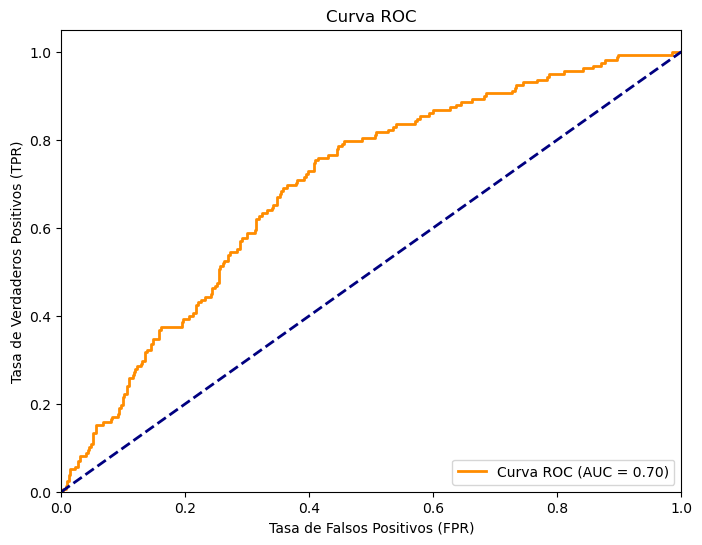

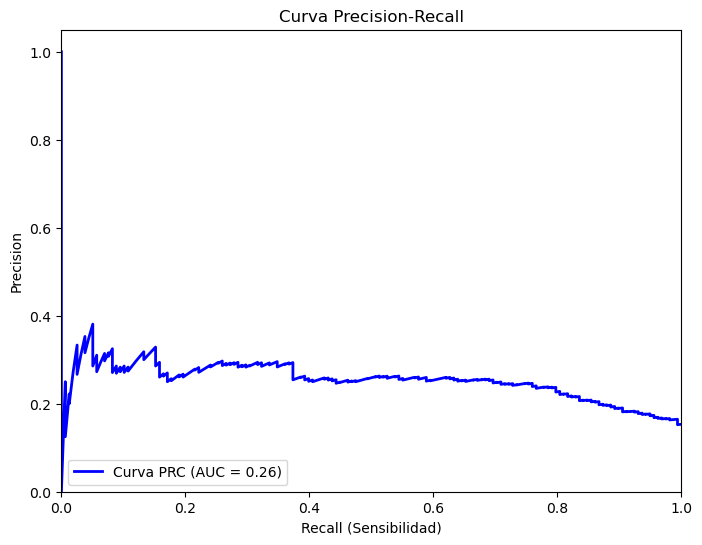

In [116]:
# Obtener las probabilidades de predicción para el conjunto de prueba
# model.predict_proba() devuelve las probabilidades para cada clase, pero solo nos interesa la probabilidad de la clase positiva (1)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades de que la clase sea 1 (positiva)

# Calcular el AUC-ROC (Área bajo la curva ROC)
# El AUC-ROC mide la capacidad del modelo para distinguir entre clases, siendo 1 el valor perfecto y 0.5 un modelo sin discriminación
roc_auc = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {roc_auc}')

# Calcular el AUC-PR (Área bajo la curva Precision-Recall)
# El AUC-PR mide el trade-off entre precisión y recall, siendo útil en conjuntos de datos desbalanceados
prc_auc = average_precision_score(y_test, y_prob)
print(f'AUC-PR: {prc_auc}')

# Calcular los valores para la curva ROC
# fpr: Tasa de falsos positivos, tpr: Tasa de verdaderos positivos, thresholds_roc: Umbrales
fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob)

# Calcular los valores para la curva Precision-Recall
# precision: Precisión, recall: Sensibilidad (tasa de verdaderos positivos), thresholds_prc: Umbrales
precision, recall, thresholds_prc = precision_recall_curve(y_test, y_prob)

# Graficar la curva ROC (Receiver Operating Characteristic)
# La curva ROC muestra el rendimiento del clasificador a diferentes umbrales, representando el equilibrio entre TPR y FPR
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal que representa un modelo aleatorio
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')

# Graficar la curva Precision-Recall (PRC)
# La curva PRC muestra el equilibrio entre precisión y recall a diferentes umbrales
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Curva PRC (AUC = %0.2f)' % prc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall (Sensibilidad)')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')

# Mostrar ambas curvas (ROC y PRC)
plt.show()


### <span style="color:blue">Evaluación del Modelo con AUC-ROC y AUC-PR</span>

#### <span style="color:green">AUC-ROC (Área Bajo la Curva ROC)</span>

El **AUC-ROC** es de **0.696**. Esta métrica mide la capacidad del modelo para distinguir entre las clases positivas y negativas. Un valor cercano a 1 indica que el modelo es muy bueno en distinguir entre las dos clases, mientras que un valor de 0.5 indica que el modelo se asemeja a un clasificador aleatorio.

En este caso, el valor **0.696** sugiere que el modelo tiene una **capacidad moderada** para predecir correctamente los casos. El modelo es mejor que el azar, pero no lo suficientemente como para ser considerado un buen clasificador.

- Cuanto más cerca está la curva de la esquina superior izquierda, mejor es el rendimiento del modelo. En este caso, la curva está por encima de la línea diagonal, lo que indica que el modelo tiene poder predictivo, aunque está lejos de un rendimiento óptimo.
 
#### <span style="color:green">AUC-PR (Área Bajo la Curva Precision-Recall)</span>

El **AUC-PR** fue **0.256**, lo que indica un rendimiento limitado en términos de **precisión** y **recall**. Este valor es útil en problemas de clasificación con datos desbalanceados, como en este caso donde la clase 1 es minoritaria.

- El gráfico muestra que el modelo tiene una **baja precisión** cuando el **recall** aumenta, lo que sugiere que el modelo comete muchos **falsos positivos** al intentar capturar más casos positivos.

### <span style="color:orange">Conclusión de los Resultados:</span>

1. El modelo tiene una capacidad de clasificación moderada (**AUC-ROC de 0.696**) por lo que no es completamente fiable para distinguir entre las clases 0 y 1.

2. El **AUC-PR de 0.256** refleja que el modelo tiene dificultades para predecir correctamente la clase positiva (personas que desarrollarán enfermedad coronaria) por el desbalance en los datos.

3. La **Curva ROC** indica que el modelo tiene un rendimiento razonable, pero la distancia de la curva a la esquina superior izquierda muestra que todavía hay muchos falsos positivos.

4. La **Curva Precision-Recall** muestra que cuando el modelo trata de mejorar el recall reduce la precisión, lo que genera más falsos positivos.




## <span style="color:purple">10.- Separación de modelos</span>

El objetivo es separar los modelos de regresión anteriores (regresión lineal y regresión logística) en dos modelos distintos considerando alguna variable categórica.

Para abordar este punto:

1. Modelo de regresión lineal con una variable categórica: 

    - Utilizamos el modelo de regresión lineal del punto 8 para introducir una variable categórica. Para este caso usaremos la variable *sex* para separar el análisis en hombres y mujeres.

    - Codificamos la variable categórica utilizando *pd.get_dummies()*.

    - Entrenamos el modelo para cada categoría y observaremos si hay diferencias en las predicciones del índice de masa corporal (BMI).


2. Modelo de regresión logística con una variable categórica:

    - Separamos el análisis por la variable categórica *sex*.
     
    - Analizamos el efecto de esta variable categórica en la predicción del riesgo de enfermedad coronaria (TenYearCHD).
    
    - Comparamos cómo varían las métricas de evaluación del modelo dependiendo de la categoría.
    
    
### <span style="color:blue">Regresión lineal con variable categórica 'sex'</span>

In [103]:
# Separar los datos en hombres y mujeres utilizando la columna 'sex'
df_hombres = df_clean_no_outliers[df_clean_no_outliers['sex'] == 'M']
df_mujeres = df_clean_no_outliers[df_clean_no_outliers['sex'] == 'F']

# Definir las variables predictoras (características) y la variable objetivo (BMI) para hombres y mujeres
# Las variables predictoras incluyen edad, presión sistólica y diastólica, colesterol total, ritmo cardíaco y glucosa
X_hombres = df_hombres[['age', 'sysBP', 'diaBP', 'totChol', 'heartRate', 'glucose']]
y_hombres = df_hombres['BMI']

X_mujeres = df_mujeres[['age', 'sysBP', 'diaBP', 'totChol', 'heartRate', 'glucose']]
y_mujeres = df_mujeres['BMI']

# Agregar una constante (intercepto) a las variables predictoras para el modelo de regresión lineal OLS
# El modelo OLS requiere una constante para ajustarse adecuadamente
X_hombres = sm.add_constant(X_hombres)
X_mujeres = sm.add_constant(X_mujeres)

# Dividir los datos en conjuntos de entrenamiento (70%) y prueba (30%) para hombres y mujeres
# La división es aleatoria pero reproducible con 'random_state=42'
X_train_hombres, X_test_hombres, y_train_hombres, y_test_hombres = train_test_split(X_hombres, y_hombres, test_size=0.3, random_state=42)
X_train_mujeres, X_test_mujeres, y_train_mujeres, y_test_mujeres = train_test_split(X_mujeres, y_mujeres, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de Regresión Lineal Ordinaria (OLS) para los hombres usando el conjunto de entrenamiento
modelo_hombres = sm.OLS(y_train_hombres, X_train_hombres).fit()

# Crear y entrenar el modelo de Regresión Lineal Ordinaria (OLS) para las mujeres usando el conjunto de entrenamiento
modelo_mujeres = sm.OLS(y_train_mujeres, X_train_mujeres).fit()

# Evaluar el rendimiento del modelo para hombres prediciendo los valores del BMI en el conjunto de prueba
# Se calculan el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R2)
y_pred_hombres = modelo_hombres.predict(X_test_hombres)
mse_hombres = mean_squared_error(y_test_hombres, y_pred_hombres)
r2_hombres = r2_score(y_test_hombres, y_pred_hombres)

# Evaluar el rendimiento del modelo para mujeres prediciendo los valores del BMI en el conjunto de prueba
# Se calculan el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R2)
y_pred_mujeres = modelo_mujeres.predict(X_test_mujeres)
mse_mujeres = mean_squared_error(y_test_mujeres, y_pred_mujeres)
r2_mujeres = r2_score(y_test_mujeres, y_pred_mujeres)

# Imprimir el resumen de los modelos
print("Resumen del modelo para hombres:\n")
print(modelo_hombres.summary())

print("\n\n**********************************************************************************************")
print("______________________________________________________________________________________________")

print("\n\nResumen del modelo para mujeres:\n")
print(modelo_mujeres.summary())

print("\n\n******************************************************************")
print("__________________________________________________________________")

# Imprimir los resultados de las métricas
print(f'\n\nModelo Hombres: MSE = {mse_hombres}, R² = {r2_hombres}')

print("__________________________________________________________________")

print(f'\nModelo Mujeres: MSE = {mse_mujeres}, R² = {r2_mujeres}')


Resumen del modelo para hombres:

                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     21.84
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           2.36e-24
Time:                        22:15:04   Log-Likelihood:                -2794.9
No. Observations:                1106   AIC:                             5604.
Df Residuals:                    1099   BIC:                             5639.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0

### <span style="color:orange">Comparación de los modelos</span>

#### <span style="color:green">Modelo para hombres</span>

- **R2 = 0,1036**: El modelo explica solo un 10,36% de la variabilidad en el índice de masa corporal (IMC). Esto indica un ajuste muy bajo.

- **MSE = 8.8624**: El error cuadrático medio muestra la magnitud del error en las predicciones, que es bastante alto.

- **Coeficientes significativos**: El colesterol total (totChol) y la presión arterial diastólica (diaBP) son las únicas variables asociadas al IMC (P < 0,05). Las demás variables no parecen tener un impacto relevante en el IMC.

**Conclusión** : Aunque el modelo presenta algunos coeficientes significativos, la capacidad del modelo para predecir el IMC en hombres es limitada. Esto se refleja por el bajo valor de R².

#### <span style="color:green">Modelo para mujeres</span>

- **R² = 0.1175**: El modelo explica el 11.75% de la variabilidad en el IMC para mujeres, lo que sugiere un ajuste ligeramente mejor que el modelo para hombres, aunque sigue siendo bajo.

- **MSE = 11.4061**: El error cuadrático medio es mayor en comparación con el modelo para hombres, lo que sugiere que las predicciones del modelo son menos precisas.

- **Coeficientes significativos**: La edad, la presión arterial sistólica (sysBP) y la presión arterial diastólica (diaBP) resultaron estar altamente asociadas con el IMC (P < 0.05), mientras que otras variables como la frecuencia cardíaca (heartRate) no mostraron una relación significativa.

**Conclusión** : El modelo para mujeres presenta una capacidad predictiva ligeramente mejor, pero al igual que el modelo para hombres, el ajuste es limitado, lo que sugiere que faltan variables importantes que podrían mejorar la capacidad predictiva.

#### <span style="color:orange">Conclusión general:</span> Ambos modelos presentan un ajuste limitado, con bajos valores de R2. Aunque las variables de presión arterial diastólica y colesterol son significativas para ambos géneros, hay otras variables que no aportan significativamente al modelo. 


### <span style="color:blue">Regresión logística con variable categórica 'sex'</span>

In [104]:
# Separar los datos en dos subconjuntos: hombres y mujeres, usando la columna 'sex'
df_hombres = df_clean_no_outliers[df_clean_no_outliers['sex'] == 'M']
df_mujeres = df_clean_no_outliers[df_clean_no_outliers['sex'] == 'F']

# Verificar la distribución de la variable objetivo 'TenYearCHD' (riesgo de enfermedad coronaria a 10 años) para hombres y mujeres
# 'value_counts(normalize=True)' devuelve la proporción de cada clase, permitiendo evaluar si las clases están balanceadas
print("\nDistribución Hombres:\n", df_hombres['TenYearCHD'].value_counts(normalize=True))
print("\n\nDistribución Mujeres:\n", df_mujeres['TenYearCHD'].value_counts(normalize=True))



Distribución Hombres:
 TenYearCHD
0    0.813409
1    0.186591
Name: proportion, dtype: float64


Distribución Mujeres:
 TenYearCHD
0    0.892632
1    0.107368
Name: proportion, dtype: float64


In [117]:
# Seleccionar las variables predictoras y la variable objetivo (TenYearCHD) para hombres y mujeres
# Las variables predictoras incluyen edad, presión sistólica y diastólica, colesterol total, ritmo cardíaco y glucosa
# La variable objetivo es 'TenYearCHD' que indica el riesgo de enfermedad coronaria a 10 años
X_hombres_log = df_hombres[['age', 'sysBP', 'diaBP', 'totChol', 'heartRate', 'glucose']]
y_hombres_log = df_hombres['TenYearCHD']

X_mujeres_log = df_mujeres[['age', 'sysBP', 'diaBP', 'totChol', 'heartRate', 'glucose']]
y_mujeres_log = df_mujeres['TenYearCHD']

# Dividir los datos en conjuntos de entrenamiento (70%) y prueba (30%) para hombres y mujeres
# 'random_state=42' asegura que los resultados sean reproducibles
X_train_hombres, X_test_hombres, y_train_hombres, y_test_hombres = train_test_split(X_hombres_log, y_hombres_log, test_size=0.3, random_state=42)
X_train_mujeres, X_test_mujeres, y_train_mujeres, y_test_mujeres = train_test_split(X_mujeres_log, y_mujeres_log, test_size=0.3, random_state=42)

# Aplicar SMOTE (Synthetic Minority Over-sampling Technique) para balancear las clases en los conjuntos de entrenamiento
# SMOTE genera ejemplos sintéticos para la clase minoritaria en los datos de hombres y mujeres
smote = SMOTE(random_state=42)
X_train_hombres_balanced, y_train_hombres_balanced = smote.fit_resample(X_train_hombres, y_train_hombres)
X_train_mujeres_balanced, y_train_mujeres_balanced = smote.fit_resample(X_train_mujeres, y_train_mujeres)

# Crear y entrenar un modelo de regresión logística para los hombres utilizando los datos balanceados
# Se utiliza 'max_iter=1000' para permitir más iteraciones y asegurar la convergencia del modelo
modelo_hombres_log = LogisticRegression(max_iter=1000)
modelo_hombres_log.fit(X_train_hombres_balanced, y_train_hombres_balanced)

# Crear y entrenar un modelo de regresión logística para las mujeres utilizando los datos balanceados
modelo_mujeres_log = LogisticRegression(max_iter=1000)
modelo_mujeres_log.fit(X_train_mujeres_balanced, y_train_mujeres_balanced)

# Evaluar el modelo para hombres prediciendo las etiquetas y las probabilidades del conjunto de prueba
y_pred_hombres_log = modelo_hombres_log.predict(X_test_hombres)
y_pred_prob_hombres_log = modelo_hombres_log.predict_proba(X_test_hombres)[:, 1]  # Obtener la probabilidad de la clase positiva (TenYearCHD)

# Evaluar el modelo para mujeres prediciendo las etiquetas y las probabilidades del conjunto de prueba
y_pred_mujeres_log = modelo_mujeres_log.predict(X_test_mujeres)
y_pred_prob_mujeres_log = modelo_mujeres_log.predict_proba(X_test_mujeres)[:, 1]  # Obtener la probabilidad de la clase positiva (TenYearCHD)

# Generar un reporte de clasificación para hombres que incluye métricas como precisión, recall y f1-score
print("\nReporte de clasificación para hombres:\n\n", classification_report(y_test_hombres, y_pred_hombres_log))

# Mostrar la matriz de confusión para hombres, que indica verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos
print("\nMatriz de confusión para hombres:\n\n", confusion_matrix(y_test_hombres, y_pred_hombres_log))

# Generar un reporte de clasificación para mujeres que incluye las mismas métricas que el de hombres
print("\n\nReporte de clasificación para mujeres:\n", classification_report(y_test_mujeres, y_pred_mujeres_log))

# Mostrar la matriz de confusión para mujeres
print("\nMatriz de confusión para mujeres:\n", confusion_matrix(y_test_mujeres, y_pred_mujeres_log))



Reporte de clasificación para hombres:

               precision    recall  f1-score   support

           0       0.90      0.65      0.75       382
           1       0.33      0.70      0.45        93

    accuracy                           0.66       475
   macro avg       0.61      0.67      0.60       475
weighted avg       0.79      0.66      0.69       475


Matriz de confusión para hombres:

 [[248 134]
 [ 28  65]]


Reporte de clasificación para mujeres:
               precision    recall  f1-score   support

           0       0.94      0.65      0.77       503
           1       0.21      0.69      0.32        67

    accuracy                           0.65       570
   macro avg       0.57      0.67      0.54       570
weighted avg       0.85      0.65      0.71       570


Matriz de confusión para mujeres:
 [[325 178]
 [ 21  46]]


### <span style="color:blue">Evaluación del modelo</span>

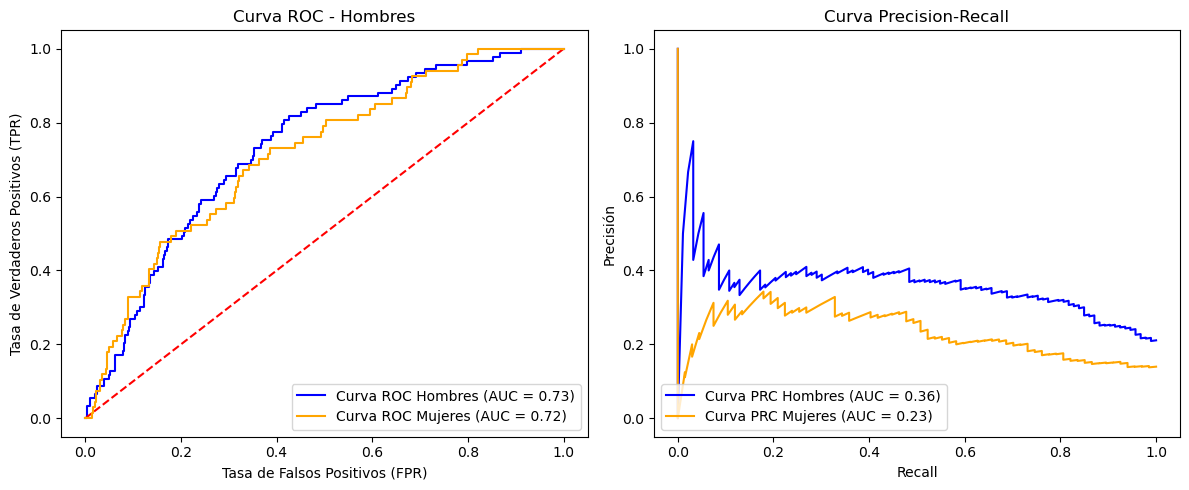

In [118]:
# Calcular los valores para la curva ROC (Receiver Operating Characteristic) y el AUC-ROC (Área bajo la curva ROC) para hombres
# fpr_hombres: Tasa de falsos positivos, tpr_hombres: Tasa de verdaderos positivos
fpr_hombres, tpr_hombres, _ = roc_curve(y_test_hombres, y_pred_prob_hombres_log)
roc_auc_hombres = auc(fpr_hombres, tpr_hombres)  # Calcular el AUC-ROC para hombres

# Calcular los valores para la curva Precision-Recall (PRC) y el AUC-PR (Área bajo la curva Precision-Recall) para hombres
# precision_hombres: Precisión, recall_hombres: Sensibilidad
precision_hombres, recall_hombres, _ = precision_recall_curve(y_test_hombres, y_pred_prob_hombres_log)
prc_auc_hombres = auc(recall_hombres, precision_hombres)  # Calcular el AUC-PR para hombres

# Calcular los valores para la curva ROC y AUC-ROC para mujeres
fpr_mujeres, tpr_mujeres, _ = roc_curve(y_test_mujeres, y_pred_prob_mujeres_log)
roc_auc_mujeres = auc(fpr_mujeres, tpr_mujeres)  # Calcular el AUC-ROC para mujeres

# Calcular los valores para la curva Precision-Recall y AUC-PR para mujeres
precision_mujeres, recall_mujeres, _ = precision_recall_curve(y_test_mujeres, y_pred_prob_mujeres_log)
prc_auc_mujeres = auc(recall_mujeres, precision_mujeres)  # Calcular el AUC-PR para mujeres

# Gráficos: Comparación de curvas ROC y Precision-Recall para hombres y mujeres
plt.figure(figsize=(12, 5))  # Configurar el tamaño de la figura

# Subgráfico 1: Curva ROC para hombres y mujeres
plt.subplot(1, 2, 1)
# Curva ROC para hombres
plt.plot(fpr_hombres, tpr_hombres, color='blue', label=f'Curva ROC Hombres (AUC = {roc_auc_hombres:.2f})')
# Línea diagonal roja que representa un modelo aleatorio (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Hombres')
plt.legend(loc="lower right")  # Mostrar la leyenda en la esquina inferior derecha

# Curva ROC para mujeres
plt.plot(fpr_mujeres, tpr_mujeres, color='orange', label=f'Curva ROC Mujeres (AUC = {roc_auc_mujeres:.2f})')
plt.legend(loc="lower right")  # Mostrar la leyenda en la esquina inferior derecha

# Subgráfico 2: Curva Precision-Recall para hombres y mujeres
plt.subplot(1, 2, 2)
# Curva Precision-Recall para hombres
plt.plot(recall_hombres, precision_hombres, color='blue', label=f'Curva PRC Hombres (AUC = {prc_auc_hombres:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva Precision-Recall')

# Curva Precision-Recall para mujeres
plt.plot(recall_mujeres, precision_mujeres, color='orange', label=f'Curva PRC Mujeres (AUC = {prc_auc_mujeres:.2f})')
plt.legend(loc="lower left")  # Mostrar la leyenda en la esquina inferior izquierda

# Ajustar el diseño de la figura para evitar solapamiento
plt.tight_layout()
# Mostrar ambas curvas ROC y Precision-Recall
plt.show()


### <span style="color:orange">Comparación de los modelos</span>

#### <span style="color:green">Modelo para hombres</span>

- **Matriz de Confusión**

    - Verdaderos negativos (Clase 0): 248
    - Falsos positivos: 134
    - Falsos negativos: 28
    - Verdaderos positivos (Clase 1): 65

- **Precisión, Recall y F1-Score**

    - Clase 0: Precisión = 0.90, Recall = 0.65, F1-Score = 0.75
    - Clase 1: Precisión = 0.33, Recall = 0.70, F1-Score = 0.45
    - Precisión Global: 0.66

- **AUC-ROC**: 0.73

- **AUC-PR**: 0.36

- **Conclusión**: El modelo para hombres tiene una mayor capacidad para predecir correctamente los casos negativos (Clase 0), con una precisión del 90%. Sin embargo, la precisión para la Clase 1 es baja (33%), aunque el recall es relativamente alto (70%), lo que sugiere que el modelo es capaz de capturar la mayoría de los positivos, aunque a costa de muchos falsos positivos. El área bajo la curva ROC es de 0.73, lo que indica una buena discriminación entre clases.

#### <span style="color:green">Modelo para mujeres</span>

- **Matriz de Confusión**

    - Verdaderos negativos (Clase 0): 325
    - Falsos positivos: 178
    - Falsos negativos: 21
    - Verdaderos positivos (Clase 1): 46

- **Precisión, Recall y F1-Score**

    - Clase 0: Precisión = 0.94, Recall = 0.65, F1-Score = 0.77
    - Clase 1: Precisión = 0.21, Recall = 0.69, F1-Score = 0.32
    - Precisión Global: 0.65

- **AUC-ROC**: 0.72

- **AUC-PR**: 0.23

- **Conclusión**: El modelo para mujeres muestra resultados similares al de hombres, con una mejor precisión en la predicción de la Clase 0 (94%). Sin embargo, la precisión para la Clase 1 es aún más baja que en el modelo de hombres (21%), aunque el recall también es alto (69%). El área bajo la curva ROC es ligeramente inferior (0.72) y la curva de precisión-recall tiene un AUC más bajo (0.23), lo que sugiere que el modelo tiene más dificultades para predecir correctamente los casos positivos.

#### <span style="color:green">Comparación de Curvas ROC y Precision-Recall</span>

Ambos modelos tienen un rendimiento similar en términos de AUC-ROC (0.73 para hombres y 0.72 para mujeres). Sin embargo, en cuanto a la curva de precisión-recall, el modelo para hombres tiene un mejor desempeño (AUC = 0.36) en comparación con el de mujeres (AUC = 0.23). Esto quiere decir que aunque ambos modelos tienen dificultades para predecir correctamente los casos positivos, el modelo para hombres maneja mejor el equilibrio entre precisión y recall.


#### <span style="color:orange">Conclusión:</span> El modelo de regresión logística para hombres y mujeres muestra un buen desempeño para predecir la Clase 0 (no presentar riesgo de enfermedad coronaria en 10 años), pero ambos modelos luchan por predecir correctamente la Clase 1 (presentar riesgo de enfermedad coronaria). La curva de ROC muestra un desempeño ligeramente mejor para hombres, y la curva de precisión-recall también sugiere que el modelo para hombres es más eficiente al manejar la predicción de la Clase 1.